Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import os

Checking image colorspace

In [2]:
image_path = os.path.join('.', 'dataset', 'yes', 'Te-gl_0010.jpg')
img = cv2.imread(image_path)

if len(img.shape) == 2:
    print("The image is in grayscale.")
elif len(img.shape) == 3:
    if img.shape[2] == 3:
        print("The image is in BGR colorspace.")
    elif img.shape[2] == 4:
        print("The image is in BGRA colorspace.")
else:
    print("Unknown colorspace.")

The image is in BGR colorspace.


Loading and resizing the data

In [3]:
X = []
y = []

yes_path = os.path.join('.', 'dataset', 'yes')
no_path = os.path.join('.', 'dataset', 'no')

target_size = (128, 128)

for file in os.listdir(yes_path):
    file_path = os.path.join(yes_path, file)
    img = cv2.imread(file_path)
    if img is not None:  # Check if image is read successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, target_size)
        X.append(img)
        y.append(1)

for file in os.listdir(no_path):
    file_path = os.path.join(no_path, file)
    img = cv2.imread(file_path)
    if img is not None:  # Check if image is read successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, target_size)
        X.append(img)
        y.append(0)

X = np.array(X)
y = np.array(y)

Check the shapes of the arrays

In [4]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1574, 128, 128)
y shape: (1574,)


Splitting into training and validation data

In [5]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

Building the model

In [6]:
from keras import layers, models

input_shape = (128,128,1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the model

In [7]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20


40/40 [==============================] - 10s 207ms/step - loss: 8.6965 - accuracy: 0.6593 - val_loss: 0.5520 - val_accuracy: 0.7397
Epoch 2/20
40/40 [==============================] - 9s 219ms/step - loss: 0.3849 - accuracy: 0.8276 - val_loss: 0.3782 - val_accuracy: 0.8476
Epoch 3/20
40/40 [==============================] - 9s 212ms/step - loss: 0.2685 - accuracy: 0.8928 - val_loss: 0.3124 - val_accuracy: 0.8730
Epoch 4/20
40/40 [==============================] - 8s 192ms/step - loss: 0.1914 - accuracy: 0.9206 - val_loss: 0.2928 - val_accuracy: 0.8794
Epoch 5/20
40/40 [==============================] - 8s 191ms/step - loss: 0.1218 - accuracy: 0.9587 - val_loss: 0.3918 - val_accuracy: 0.8984
Epoch 6/20
40/40 [==============================] - 8s 191ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.3505 - val_accuracy: 0.9016
Epoch 7/20
40/40 [==============================] - 8s 211ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.2733 - val_accuracy: 0.9016
Epo

Evaluating the model

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10/10 - 1s - loss: 0.6754 - accuracy: 0.9175 - 642ms/epoch - 64ms/step

Test accuracy: 0.9174603223800659


Plotting the training

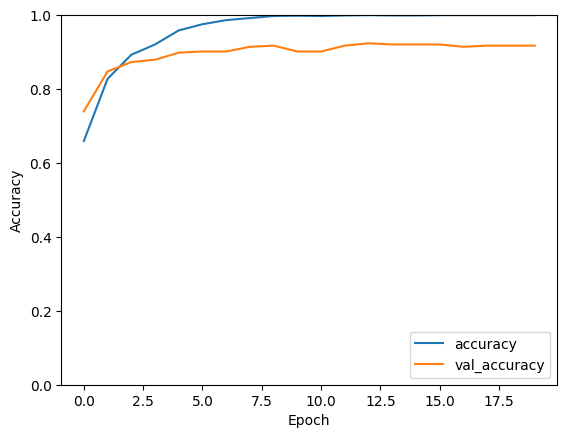

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()